# Analysis Notebook for BenchExec Experiments

This notebook pre-processes the results obtained from Benchexec and plot it using seaborn.

In [31]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import dtale

# sys.dont_write_bytecode = True  # prevent creation of .pyc files

CSV_FOLDER = "stats/"

## 1. Load data from CSV

Collect all CSV result files under `CSV_FOLDER` folder.

In [32]:
print(f"CSV files found in folder {CSV_FOLDER}:")
files = glob.glob(os.path.join(CSV_FOLDER, "results.*.csv"))

# optional filter
# files = [f for f in files if "PALA" not in f]

files

CSV files found in folder stats/:


['stats/results.template.csv']

In [33]:
dfs = []
for f in files:
    df = pd.read_csv(f, delimiter=",", skiprows=0)
    dfs.append(df)

df = pd.concat(dfs).reset_index(drop=True)

df

,domain,instance,planner,status,time
0,domain_1,p1,PLN_1,1,696.853460
1,domain_1,p2,PLN_1,1,937.635543
2,domain_1,p3,PLN_1,1,859.808497
3,domain_1,p4,PLN_1,1,956.171514
4,domain_1,p5,PLN_1,1,940.861331
...,...,...,...,...,...
5390,domain_24,p8,PLN_5,0,-1.000000
5391,domain_24,p9,PLN_5,0,-1.000000
5392,domain_24,p10,PLN_5,0,-1.000000
5393,domain_24,p11,PLN_5,0,-1.000000


Add bolean `solved` column:

In [34]:
# next, define Boolean column solved to flag if solved or not based on status
df.insert(3, "solved", df['status'].apply(lambda x: True if x == 1 else False))

df

,domain,instance,planner,solved,status,time
0,domain_1,p1,PLN_1,True,1,696.853460
1,domain_1,p2,PLN_1,True,1,937.635543
2,domain_1,p3,PLN_1,True,1,859.808497
3,domain_1,p4,PLN_1,True,1,956.171514
4,domain_1,p5,PLN_1,True,1,940.861331
...,...,...,...,...,...,...
5390,domain_24,p8,PLN_5,False,0,-1.000000
5391,domain_24,p9,PLN_5,False,0,-1.000000
5392,domain_24,p10,PLN_5,False,0,-1.000000
5393,domain_24,p11,PLN_5,False,0,-1.000000


In [35]:
# solver/runs found
print("Solvers/run found:", df['planner'].unique())

Solvers/run found: ['PLN_1' 'PLN_2' 'PLN_3' 'PLN_4' 'PLN_5']


Finally, save all results into a complete CSV file.

In [16]:
# df.to_csv(os.path.join(CSV_FOLDER, "results_all.csv"), index=False)

## 2. Analysis example for set benchmark (e.g., AIJ, IJCAI, SOCS, etc.)

First select subset of interest (set and solver runs):

In [36]:
PLANNERS = df["planner"].unique()
DOMAINS = df["domain"].unique()

print("Planners selected:", PLANNERS)
print("Domains selected:", DOMAINS)

df_sel = df.loc[(df.planner.isin(PLANNERS)) & (df.domain.isin(DOMAINS))]

df_sel = df

df_sel.head()

Planners selected: ['PLN_1' 'PLN_2' 'PLN_3' 'PLN_4' 'PLN_5']
Domains selected: ['domain_1' 'domain_2' 'domain_3' 'domain_4' 'domain_5' 'domain_6'
 'domain_7' 'domain_8' 'domain_9' 'domain_10' 'domain_11' 'domain_12'
 'domain_13' 'domain_14' 'domain_15' 'domain_16' 'domain_17' 'domain_18'
 'domain_19' 'domain_20' 'domain_21' 'domain_22' 'domain_23' 'domain_24']


,domain,instance,planner,solved,status,time
0,domain_1,p1,PLN_1,True,1,696.853460
1,domain_1,p2,PLN_1,True,1,937.635543
2,domain_1,p3,PLN_1,True,1,859.808497
3,domain_1,p4,PLN_1,True,1,956.171514
4,domain_1,p5,PLN_1,True,1,940.861331


Let's do a quick scattered plot for each class domain between solver run and cputime.

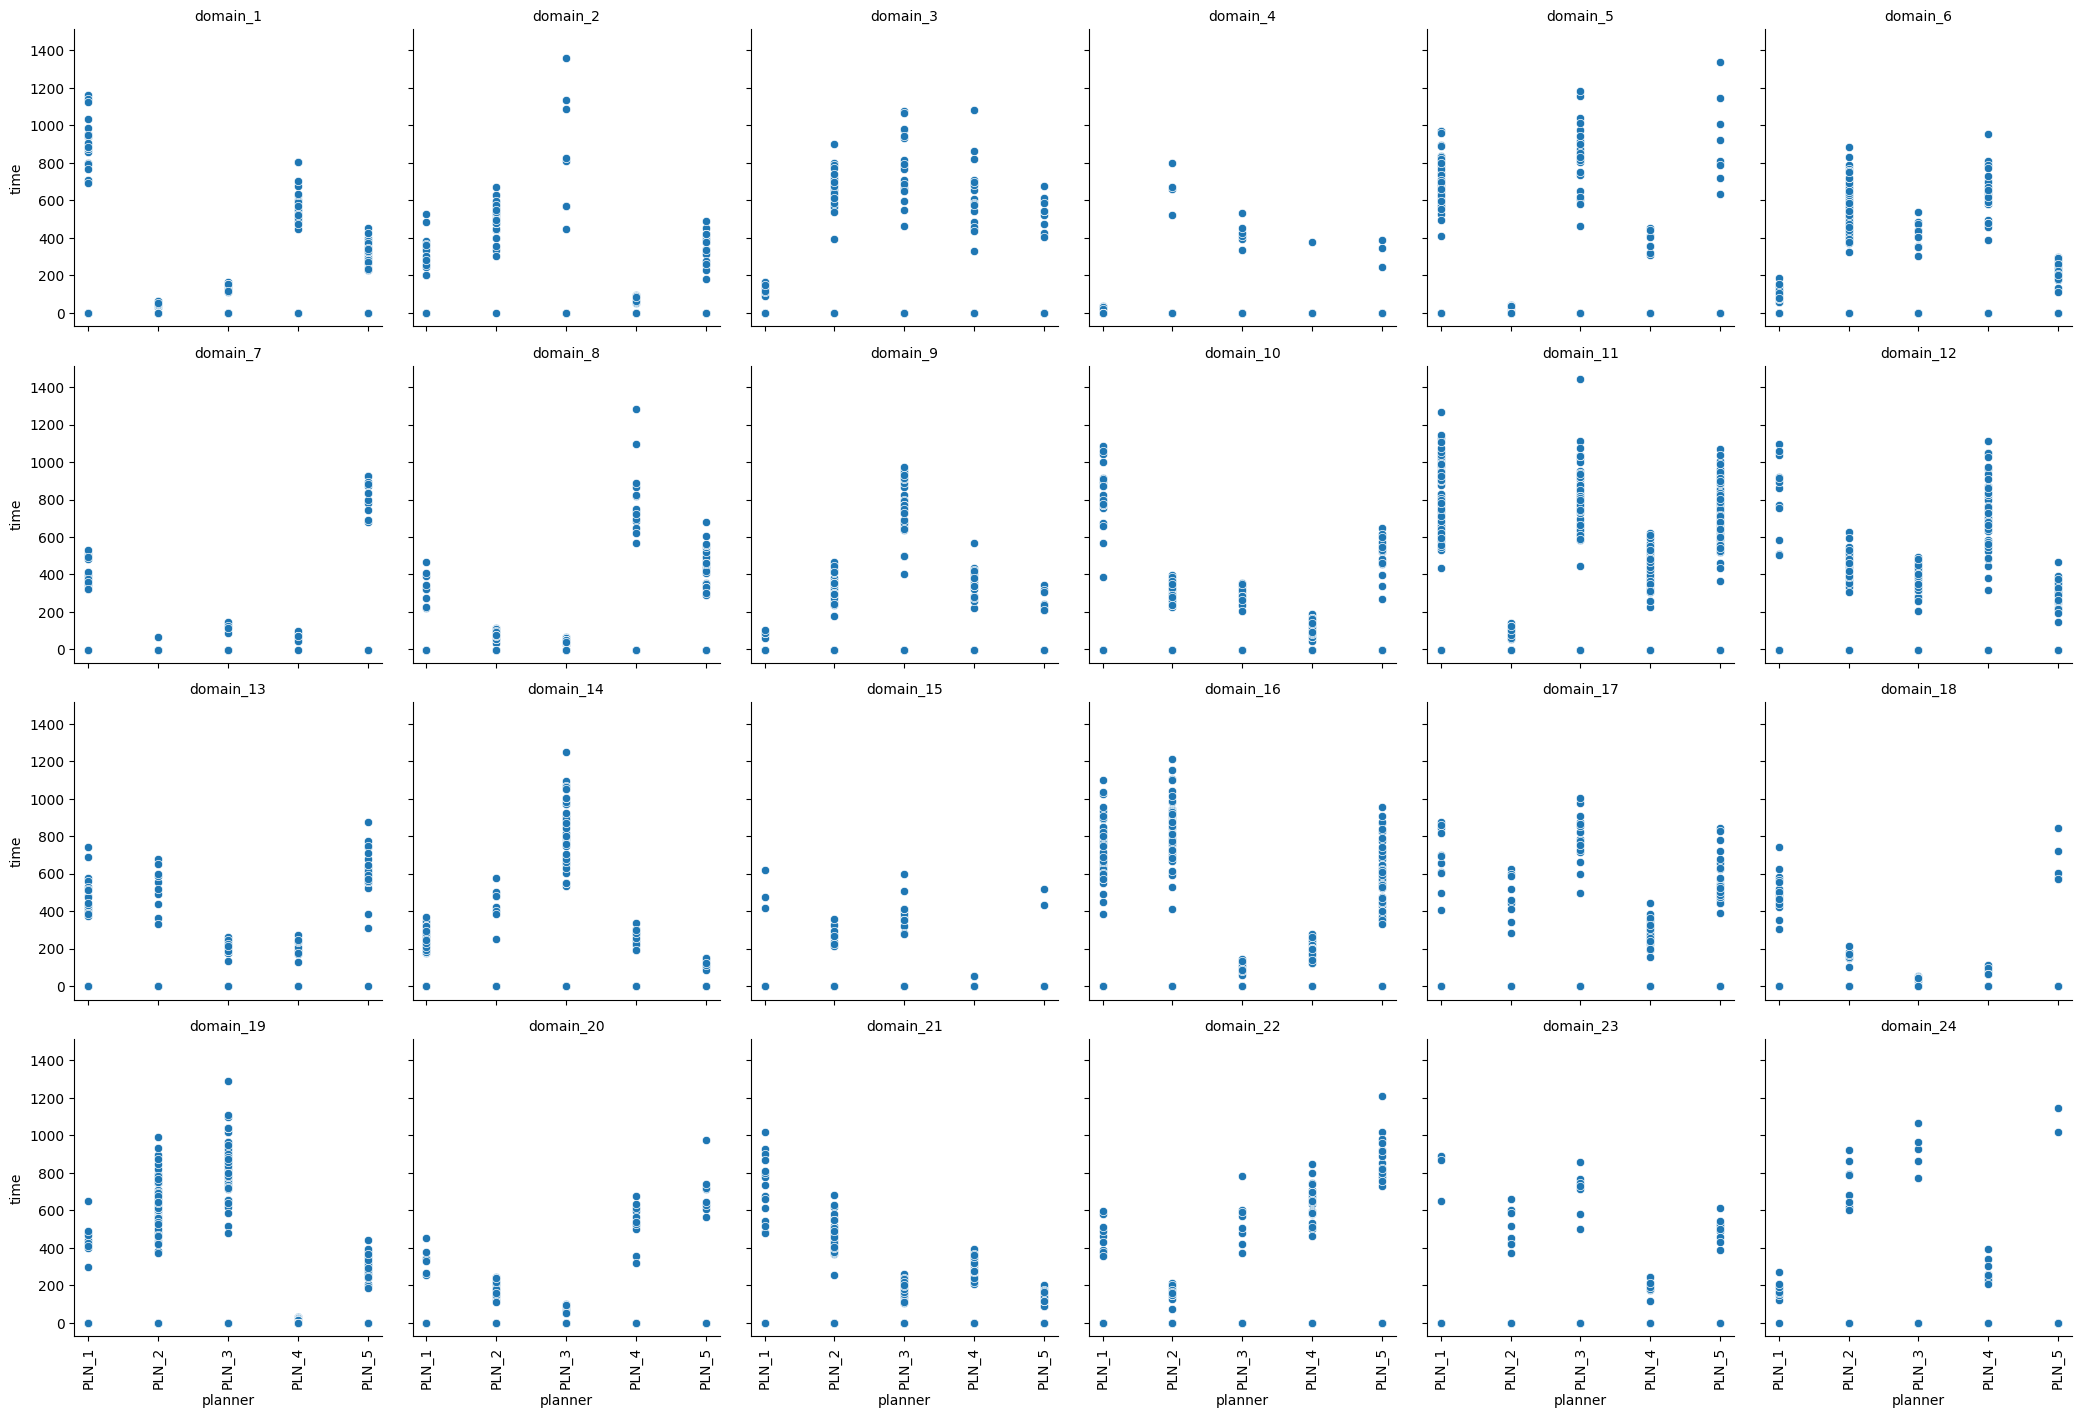

In [37]:
g = sns.relplot(data=df_sel, kind="scatter", x='planner',  y="time", col="domain",  col_wrap=6, height=3.5, aspect=1, legend=True)

g.set_titles(template='{col_name}',y=1)

# rotate x-labels
x_labels = g.axes[-1].get_xticklabels() # get x labels of last plot in grid (must have the labels!)
g.set_xticklabels(labels=x_labels, rotation=90)

## 3. Time-coverage charts for ALL full domains in selected set benchmark

In [38]:
df_sel

,domain,instance,planner,solved,status,time
0,domain_1,p1,PLN_1,True,1,696.853460
1,domain_1,p2,PLN_1,True,1,937.635543
2,domain_1,p3,PLN_1,True,1,859.808497
3,domain_1,p4,PLN_1,True,1,956.171514
4,domain_1,p5,PLN_1,True,1,940.861331
...,...,...,...,...,...,...
5390,domain_24,p8,PLN_5,False,0,-1.000000
5391,domain_24,p9,PLN_5,False,0,-1.000000
5392,domain_24,p10,PLN_5,False,0,-1.000000
5393,domain_24,p11,PLN_5,False,0,-1.000000


Count how MANY instances per full domain:

In [84]:
selection_index = ['domain']

# count the number of each run per full_domain (e.g., how many PRP runs in Barman)
count_df = df_sel.groupby(by=selection_index)['planner'].value_counts()

count_df = count_df.reset_index(name='count')

count_df


,domain,planner,count
0,domain_1,PLN_1,37
1,domain_1,PLN_2,37
2,domain_1,PLN_3,37
3,domain_1,PLN_4,37
4,domain_1,PLN_5,37
...,...,...,...
115,domain_9,PLN_1,41
116,domain_9,PLN_2,41
117,domain_9,PLN_3,41
118,domain_9,PLN_4,41


Next calculate coverage for each solver run in each full domain:

In [85]:
def compute_coverage(df: pd.DataFrame) -> pd.DataFrame:
    # columns to group-by
    selection_index = ["planner", "domain"]

    # count normalized (0-1) the number of grade after grouping for all the other values
    coverage_df = df.groupby(by=selection_index)["solved"].value_counts(normalize=True)

    # transofm the serie into a dataframe and value becomes percent
    coverage_df = coverage_df.mul(100).rename("percent").reset_index()

    # convert the rows that have 100% unsovable (False), to 0% solvable (True)
    #   otherwise, there will be no True solvable for those cases!
    mask_unsolvable = (~coverage_df.solved) & (coverage_df.percent == 100)
    coverage_df.loc[mask_unsolvable, ["solved", "percent"]] = [True, 0]

    # return the % of solvable stats
    return coverage_df.loc[coverage_df.solved].round(0)

# # merge with count of instances per full domain
coverage_df = compute_coverage(df_sel)
coverage_df = coverage_df.merge(count_df)
coverage_df

# SOME FILTERS
# coverage_df.query("not solved and percent == 100")
# coverage_df.query("solved and percent == 0")

,planner,domain,solved,percent,count
0,PLN_1,domain_1,True,54.0,37
1,PLN_1,domain_10,True,36.0,78
2,PLN_1,domain_11,True,87.0,82
3,PLN_1,domain_12,True,21.0,57
4,PLN_1,domain_13,True,83.0,24
...,...,...,...,...,...
115,PLN_5,domain_5,True,19.0,47
116,PLN_5,domain_6,True,42.0,72
117,PLN_5,domain_7,True,80.0,15
118,PLN_5,domain_8,True,39.0,72


Let's check the coverage in a particular full domain:

In [87]:
import random

x = random.choice(coverage_df['domain'].unique())
coverage_df.loc[coverage_df.domain == x]

,planner,domain,solved,percent,count
16,PLN_1,domain_24,True,92.0,12
40,PLN_2,domain_24,True,67.0,12
64,PLN_3,domain_24,True,42.0,12
88,PLN_4,domain_24,True,83.0,12
112,PLN_5,domain_24,True,17.0,12


Some useful links to make nice charts:

* [Changing plot style and color](https://s3.amazonaws.com/assets.datacamp.com/production/course_15192/slides/chapter4.pdf).
* [Advanced Seaborn: Demystifying the Complex Plots!](https://levelup.gitconnected.com/advanced-seaborn-demystifying-the-complex-plots-537582977c8c#5965 )

OK this is the main code for drawing complex combined time-coverage charts across a full set benchmark (e.g., AIJ) as done with the R's script. 

For each full domain (e.g., Barman-EIGHT50), draw a plot showing scatter time performance across instances per solver/run AND coverage bars superimposed. This was Nitin's great graphs done originally in R for ECAI'23.

In each subplot, the title shows the full domain with the number of instances run (e.g., "Barman-EIGHT50 (20)": 20 instances run for Barman-EIGHT50 full domain).

Finished building scattered plot of cputime. Next overlapping coverage bars...


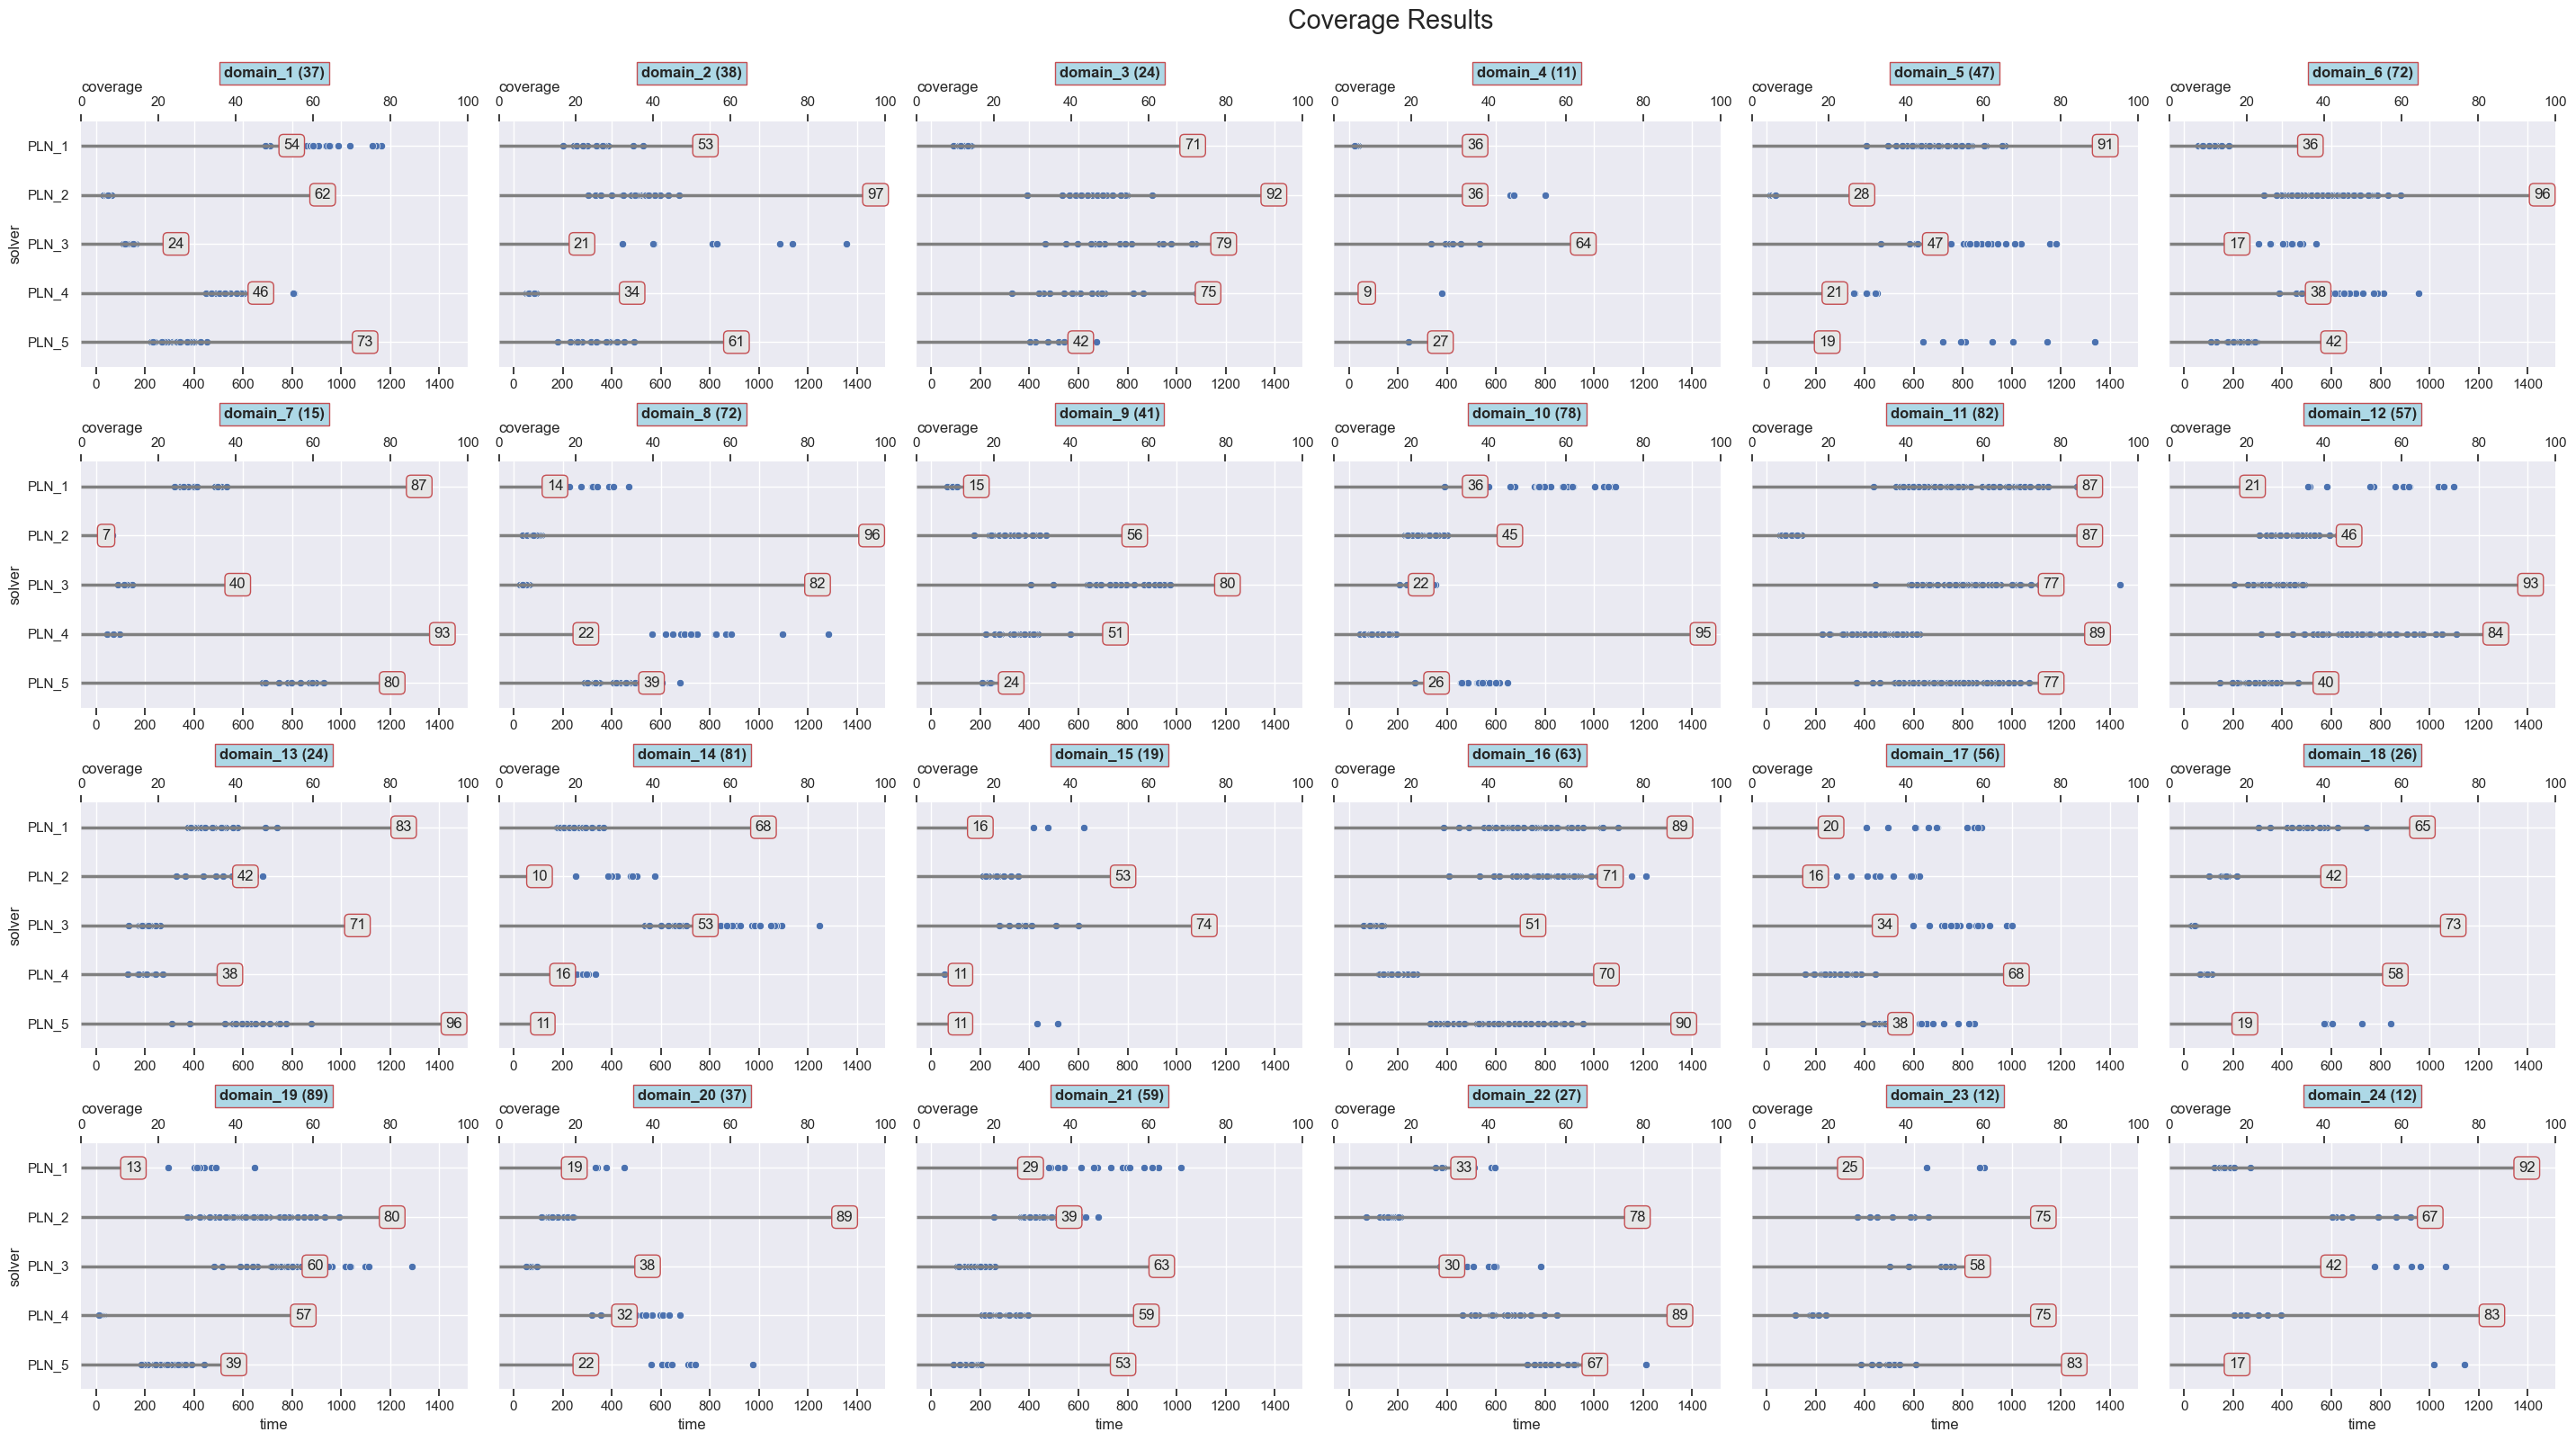

In [90]:
# https://seaborn.pydata.org/tutorial/aesthetics.html
# https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme()

# fig, ax = plt.subplots()

# FIRST graph for cputime per solver
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("darkgrid")

# box for the title of each subplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyBboxPatch.html#matplotlib.patches.FancyBboxPatch
bbox1 = dict(boxstyle="square", fc="lightblue", fill=True, color='r')
bbox2 = dict(boxstyle="round", fc="0.9", fill=True, color='r')


## FIRST, we do a scatter plot for each full domain showing cputime for each solved instance across each solver/run
# https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot
g = sns.relplot(data=df_sel.query('solved'), kind="scatter", x='time', y='planner', col="domain", col_wrap=6, height=4, aspect=1.2)
g.set_axis_labels("time", "solver")
# Let's configure the title of each subplot
#   most options are passed to text: https://matplotlib.org/stable/api/text_api.html
g.set_titles(col_template='{col_name}', fontweight="demibold",  ha='center', va='center', bbox=bbox1)

# get the whole figure title: XXX Benchmark
g.figure.suptitle(
    f"Coverage Results", ha="left", va="top", fontsize="xx-large", y=1
)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html


print("Finished building scattered plot of cputime. Next overlapping coverage bars...")

# get all the axes (subplots) of the FaceGrid
axes = g.axes.flatten()

## SECOND, super-impose the COVERAGE data in each subplot in the grid as done in https://stackoverflow.com/a/67612124
#   we also rename the title of each subplot to include no of instances run
#   we iterate on each axis and plot a barplot and add annotations/styles to it
sns.set_style("ticks")  # just ticks, no grid
for ax in axes:
    # full_domian = ax.get_title().split(' = ')[1]
    domain = ax.get_title()

    # redo title of subfigure to include number of instances between parenthesis, e.g., BARMAN-EIGHT50 (20)
    no_instances = coverage_df.loc[coverage_df.domain == ax.get_title()]['count'].unique()[0]
    ax.set_title(f"{domain} ({no_instances})", fontweight="demibold",  ha='center', va='center', bbox=bbox1)

    # add bar of coverage % for each run/solver
    ax2 = ax.twiny()    # get a twin y-axies https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html
    g2 = sns.barplot(data=coverage_df[coverage_df.domain.eq(domain)], x="percent", y="planner", width=0.0001, linewidth=2.5, edgecolor=".5", facecolor=(0, 0, 0, 0), ax=ax2)
    g2.set_xlabel('coverage', x=0, ha="left")
    g2.set_xlim([0, 100])

    # add box with % of coverage at the end of the barline
    if len(ax2.containers) > 0 :
        ax2.bar_label(ax2.containers[0], label_type='edge', padding=-5, fontweight='normal', rotation="horizontal", bbox=bbox2)


# axes[0].legend().remove()
# g.set_axis_labels(x_var=None, y_var=None, clear_inner=True)
sns.despine(left=True, bottom=True) # no spines at all

# Save it later, not here.
# plt.savefig(os.path.join(CSV_FOLDER, f"{SET}_plot.png"))

plt.tight_layout()  # at the end adjust so everything fits tight but well
plt.show()

Save graph in a PNG file:

In [39]:
g.savefig(os.path.join(CSV_FOLDER, f"{SET}_plot.png"))

## 4. Coverage Analysis

We now generate **coverage** tables, as they often apper in papers. Basically we compute per benchmark set, domain, and APP type sub-domain, and each solver-run:

- **Coverage:** % of solved instances solved by the solver-run; and
- **Stat metrics:** mean on time, memory usage, and policy size.

In [31]:
df = pd.read_csv(os.path.join(CSV_FOLDER,"results_all.csv"))

print(df.shape)
df.head()

(9080, 15)


,task,run,status,solved,cputime,walltime,memory_mb,policy_size,solve_time,translation_time,set,domain,sub_domain,full_domain,instance
0,AIJ_Barman_EIGHT50_1.yml,prp2,true,True,68.124683,68.197424,85.495808,1247.0,67.743483,0.277062,AIJ,Barman,EIGHT50,Barman-EIGHT50,1
1,AIJ_Barman_EIGHT50_10.yml,prp2,true,True,50.088596,50.107441,82.214912,4965.0,49.649540,0.279914,AIJ,Barman,EIGHT50,Barman-EIGHT50,10
2,AIJ_Barman_EIGHT50_11.yml,prp2,true,True,953.906555,954.042272,461.467648,74468.0,953.584711,0.279725,AIJ,Barman,EIGHT50,Barman-EIGHT50,11
3,AIJ_Barman_EIGHT50_12.yml,prp2,true,True,868.641473,868.775420,462.823424,77181.0,868.312224,0.280933,AIJ,Barman,EIGHT50,Barman-EIGHT50,12
4,AIJ_Barman_EIGHT50_13.yml,prp2,true,True,93.838403,93.852691,192.663552,30050.0,93.396514,0.279126,AIJ,Barman,EIGHT50,Barman-EIGHT50,13


Calculate % ratio per set/domain/sub_domain/run-solver.

In [32]:
df_grouped = df.groupby(["set", "domain", "sub_domain", "run"])

#   df_grouped.sum()[["solved"]] = sum all the True instances (sum over bool = number of True)
#   df_grouped.count()[["solved"]] = number of rows in solved column (includes True and Talse values)
df_coverage = df_grouped.sum()[["solved"]] / df_grouped.count()[["solved"]]
df_coverage

solved
set  domain     sub_domain run              
AIJ  Barman     EIGHT50    lpg          1.00
                           lpg_small    0.50
                           prp          1.00
                           prp2         1.00
                           prp2_inv0    1.00
...                                      ...
SOCS ZenoTravel STL5-43    lpg_small    0.15
                           prp          0.20
                           prp2         0.10
                           prp2_inv0    0.10
                           prp_inv0     0.20

[416 rows x 1 columns]

Calculate mean metric (for CPU time, memory, and policy size) across the solved instances.

In [25]:
columns = ["domain", "sub_domain", "run", "cputime", "memory_mb", "policy_size"]
df_solved = df.query("solved == True")[columns]

df_solved_grouped = df_solved.groupby(["domain", "sub_domain", "run"])
df_metrics = df_solved_grouped.mean()
df_metrics

cputime   memory_mb  policy_size
domain     sub_domain run                                           
Airport               lpg          1.957297  290.117888    92.937500
                      lpg_small    1.903120  289.821764    96.066667
                      paladinus    4.156144  159.891456    42.500000
                      prp         12.893395  157.106417   118.588235
                      prp2        56.927918  123.730688   117.187500
...                                     ...         ...          ...
ZenoTravel STL5-43    lpg_small   31.635788  306.262016    86.333333
                      prp        256.557254  185.479168    94.000000
                      prp2         0.778649   38.668288    66.000000
                      prp2_inv0    0.729787   38.959104    63.000000
                      prp_inv0   247.463489  185.498624    94.000000

[347 rows x 3 columns]

Put together **Coverage** and **Metrics** tables.

In [26]:
column_names = {
    "solved": "cov",
    "cputime": "time",
    "memory_mb": "mem",
    "policy_size": "size",
}

df_stats = df_coverage.join(df_metrics, how="inner")
df_stats.rename(columns=column_names, inplace=True)

df_stats = df_stats.reset_index()
df_stats.insert(0, "set", df_stats.pop("set"))

df_stats

NameError: name 'df_coverage' is not defined

In [114]:
df_stats_pivot = df_stats.pivot(
    index=["set", "domain", "sub_domain"],
    values=["cov", "time", "mem", "size"],
    columns="run",
)
df_stats_pivot.reset_index(
    inplace=True
)  # unfold multi-index into columns (create integer index)
df_stats_pivot.columns = [
    "_".join(tup).rstrip("_") for tup in df_stats_pivot.columns.values
]

# flat index, but multi-column: 1. coverage / time / policy size and 2. each solver/run
df_stats_pivot = df_stats_pivot.round(2)

df_stats_pivot

,set,domain,sub_domain,cov_lpg,cov_lpg_small,cov_prp,cov_prp2,cov_prp2_inv0,cov_prp_inv0,time_lpg,...,mem_prp,mem_prp2,mem_prp2_inv0,mem_prp_inv0,size_lpg,size_lpg_small,size_prp,size_prp2,size_prp2_inv0,size_prp_inv0
0,AIJ,Barman,EIGHT50,1.00,0.50,1.00,1.00,1.00,0.80,125.35,...,263.04,128.24,152.99,62.21,13018.35,24468.70,1854.60,14486.00,7096.90,2400.00
1,AIJ,Barman,RING50,1.00,0.95,1.00,1.00,1.00,1.00,10.57,...,242.81,51.33,247.64,41.76,1858.75,1829.63,665.75,941.30,631.85,1022.55
2,AIJ,Barman,RND50,0.55,0.25,0.70,0.75,0.75,0.45,244.70,...,119.94,176.40,90.87,148.50,34688.64,28568.20,2788.21,22645.33,6701.20,3852.22
3,AIJ,Barman,SCC56,0.35,0.10,0.60,0.30,0.75,0.25,100.46,...,104.48,106.80,105.18,45.43,24015.71,37293.50,3484.25,10391.50,15002.07,2297.60
4,AIJ,BlocksWorld,EIGHT4-51,1.00,1.00,1.00,1.00,1.00,1.00,4.21,...,175.98,39.44,213.95,104.86,106.53,98.82,207.94,233.53,233.65,207.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,SOCS,ZenoTravel,RND3-23,0.10,0.15,0.35,0.10,0.10,0.35,250.75,...,148.62,38.48,38.50,148.67,192.50,168.00,1378.86,325.50,320.00,1378.86
66,SOCS,ZenoTravel,RND54,0.65,0.80,0.90,0.35,0.25,0.90,57.08,...,672.92,117.64,144.74,672.87,6886.69,3940.56,5957.83,2833.14,5575.00,5957.83
67,SOCS,ZenoTravel,SCC3-11,0.11,0.11,0.33,NaN,0.11,0.33,437.43,...,67.05,NaN,94.21,67.08,186.00,275.00,1318.67,NaN,419.00,1318.67
68,SOCS,ZenoTravel,SCC56,0.25,0.35,0.45,0.05,0.05,0.45,78.22,...,516.77,115.50,113.44,557.39,6285.36,4713.96,11441.89,8313.00,7389.00,11154.75


Save it to the file, this can be used in the paper.

In [115]:
df_stats_pivot.to_csv(os.path.join(CSV_FOLDER, "results_stats.csv"), index=False)